In [1]:
import sys
sys.path.append("../src")

from utils.load_model import get_model

from my_model import get_ilsvrc2012

from torch.utils.data import DataLoader

from utils.imagenet1000_classname import imgnet_label_name
from utils.tensortracker import TensorTracker
from utils import plots

In [2]:
%matplotlib inline

In [3]:
import os

import torch
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

import torch.nn as nn

import svcca

In [4]:
from my_model import my_resnet

from glob import glob

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [5]:
from utils.receptive_field_tracker import RFTracker

from collections import OrderedDict

from utils.analysis import make_dir

In [6]:
root = "/data2/genta/resnet/analysis/optimalinput-seeds-64-30/"
key_arch = "resnet34-skip4"
key_layer = "layer3"

In [7]:
exts = ("png", "pdf")

In [8]:
# out_dir = os.path.join("20210106", "{}_{}".format(key_arch, key_layer))
out_dir = os.path.join("20210207", "{}_{}".format(key_arch, key_layer))
make_dir(out_dir)

In [14]:
# seeds = [0, 1230, 2020, 20201230]
seeds = [0,]
key_word = "add_func"
# key_word = "bn2"
imgs_seed = {}
for seed in seeds:
    imgs = []
    for path in sorted(glob(os.path.join(root, "{}*{}*{}".format(key_arch, key_layer, key_word), "*{:08}.npy".format(seed)))):
        print(path)
        data = np.load(path)
        print(data.shape)
        imgs.append(data)
    imgs_seed[seed] = imgs

/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-skip4_layer-layer3.0.add_func/other-images00000000.npy
(256, 3, 210, 210)
/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-skip4_layer-layer3.1.add_func/other-images00000000.npy
(256, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-skip4_layer-layer3.2.add_func/other-images00000000.npy
(256, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-skip4_layer-layer3.3.add_func/other-images00000000.npy
(256, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-skip4_layer-layer3.4.add_func/other-images00000000.npy
(256, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-skip4_layer-layer3.5.add_func/other-images00000000.npy
(256, 3, 224, 224)


In [20]:
def preprocess(_img):
    img = plots.normalize_inputspace(_img)
    img = plots.input2image(img)
#     img = plots.input2image(_img)
    return img

seed = 0
ch = 76
tmp_imgs = [preprocess(im[ch]) for seed in seeds for im in imgs_seed[seed]]

In [21]:
out_name = "{:03}".format(ch)

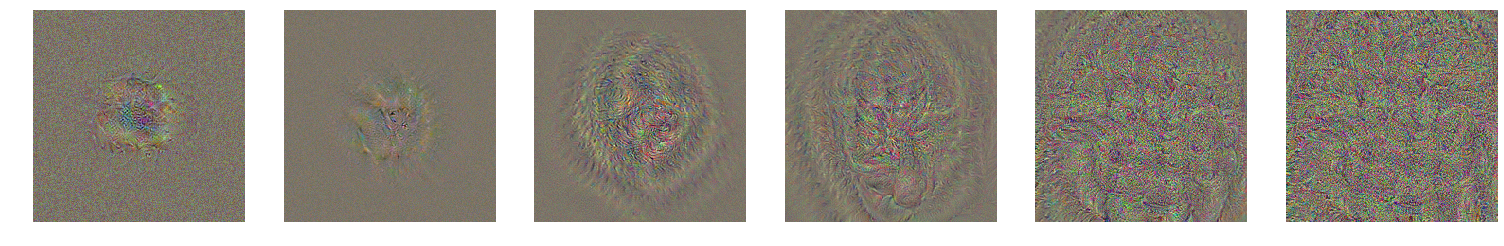

In [22]:
plots.plot_imshows(tmp_imgs, show_flag=True, nrow=len(seeds), ncol=6, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)

In [23]:
root = "/data2/genta/resnet/analysis/optimalinput-seeds-64-30/"
key_arch = "resnet34-skip4"
key_layer = "layer1"

In [24]:
exts = ("png", "pdf")

In [25]:
# out_dir = os.path.join("20210106", "{}_{}".format(key_arch, key_layer))
out_dir = os.path.join("20210207", "{}_{}".format(key_arch, key_layer))
make_dir(out_dir)

In [26]:
# seeds = [0, 1230, 2020, 20201230]
seeds = [0,]
key_word = "add_func"
# key_word = "bn2"
imgs_seed = {}
for seed in seeds:
    imgs = []
    for path in sorted(glob(os.path.join(root, "{}*{}*{}".format(key_arch, key_layer, key_word), "*{:08}.npy".format(seed)))):
        print(path)
        data = np.load(path)
        print(data.shape)
        imgs.append(data)
    imgs_seed[seed] = imgs

/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-skip4_layer-layer1.0.add_func/other-images00000000.npy
(64, 3, 27, 27)
/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-skip4_layer-layer1.1.add_func/other-images00000000.npy
(64, 3, 43, 43)
/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-skip4_layer-layer1.2.add_func/other-images00000000.npy
(64, 3, 59, 59)


In [28]:
def preprocess(_img):
    img = plots.normalize_inputspace(_img)
    img = plots.input2image(img)
#     img = plots.input2image(_img)
    return img

seed = 0
ch = 17
tmp_imgs = [preprocess(im[ch]) for seed in seeds for im in imgs_seed[seed]]

In [29]:
out_name = "{:03}".format(ch)

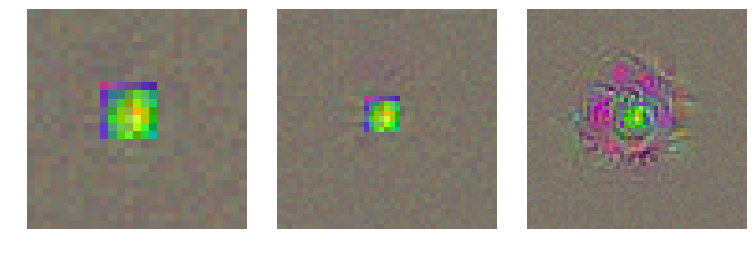

In [30]:
plots.plot_imshows(tmp_imgs, show_flag=True, nrow=len(seeds), ncol=6, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)

In [31]:
root = "/data2/genta/resnet/analysis/optimalinput-seeds-64-30/"
key_arch = "resnet34-plain4"
key_layer = "layer1"

In [32]:
exts = ("png", "pdf")

In [33]:
# out_dir = os.path.join("20210106", "{}_{}".format(key_arch, key_layer))
out_dir = os.path.join("20210207", "{}_{}".format(key_arch, key_layer))
make_dir(out_dir)

In [34]:
# seeds = [0, 1230, 2020, 20201230]
seeds = [0,]
# key_word = "add_func"
key_word = "bn2"
imgs_seed = {}
for seed in seeds:
    imgs = []
    for path in sorted(glob(os.path.join(root, "{}*{}*{}".format(key_arch, key_layer, key_word), "*{:08}.npy".format(seed)))):
        print(path)
        data = np.load(path)
        print(data.shape)
        imgs.append(data)
    imgs_seed[seed] = imgs

/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-plain4_layer-layer1.0.bn2/other-images00000000.npy
(64, 3, 27, 27)
/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-plain4_layer-layer1.1.bn2/other-images00000000.npy
(64, 3, 43, 43)
/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-plain4_layer-layer1.2.bn2/other-images00000000.npy
(64, 3, 59, 59)


In [36]:
def preprocess(_img):
    img = plots.normalize_inputspace(_img)
    img = plots.input2image(img)
#     img = plots.input2image(_img)
    return img

seed = 0
ch = 19
tmp_imgs = [preprocess(im[ch]) for seed in seeds for im in imgs_seed[seed]]

In [37]:
out_name = "{:03}".format(ch)

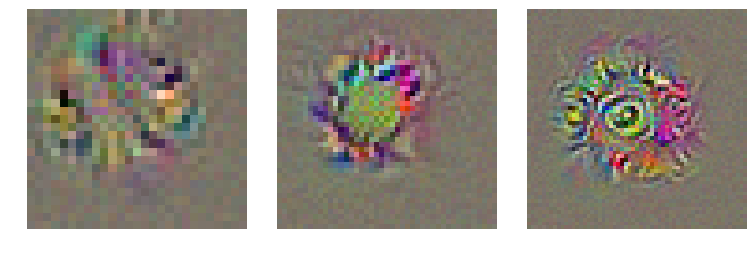

In [38]:
plots.plot_imshows(tmp_imgs, show_flag=True, nrow=len(seeds), ncol=6, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)

In [39]:
root = "/data2/genta/resnet/analysis/optimalinput-seeds-64-30/"
key_arch = "resnet34-plain4"
key_layer = "layer3"

In [40]:
exts = ("png", "pdf")

In [41]:
# out_dir = os.path.join("20210106", "{}_{}".format(key_arch, key_layer))
out_dir = os.path.join("20210207", "{}_{}".format(key_arch, key_layer))
make_dir(out_dir)

In [42]:
# seeds = [0, 1230, 2020, 20201230]
seeds = [0,]
# key_word = "add_func"
key_word = "bn2"
imgs_seed = {}
for seed in seeds:
    imgs = []
    for path in sorted(glob(os.path.join(root, "{}*{}*{}".format(key_arch, key_layer, key_word), "*{:08}.npy".format(seed)))):
        print(path)
        data = np.load(path)
        print(data.shape)
        imgs.append(data)
    imgs_seed[seed] = imgs

/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-plain4_layer-layer3.0.bn2/other-images00000000.npy
(256, 3, 210, 210)
/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-plain4_layer-layer3.1.bn2/other-images00000000.npy
(256, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-plain4_layer-layer3.2.bn2/other-images00000000.npy
(256, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-plain4_layer-layer3.3.bn2/other-images00000000.npy
(256, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-plain4_layer-layer3.4.bn2/other-images00000000.npy
(256, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-plain4_layer-layer3.5.bn2/other-images00000000.npy
(256, 3, 224, 224)


In [44]:
def preprocess(_img):
    img = plots.normalize_inputspace(_img)
    img = plots.input2image(img)
#     img = plots.input2image(_img)
    return img

seed = 0
ch = 29
tmp_imgs = [preprocess(im[ch]) for seed in seeds for im in imgs_seed[seed]]

In [45]:
out_name = "{:03}".format(ch)

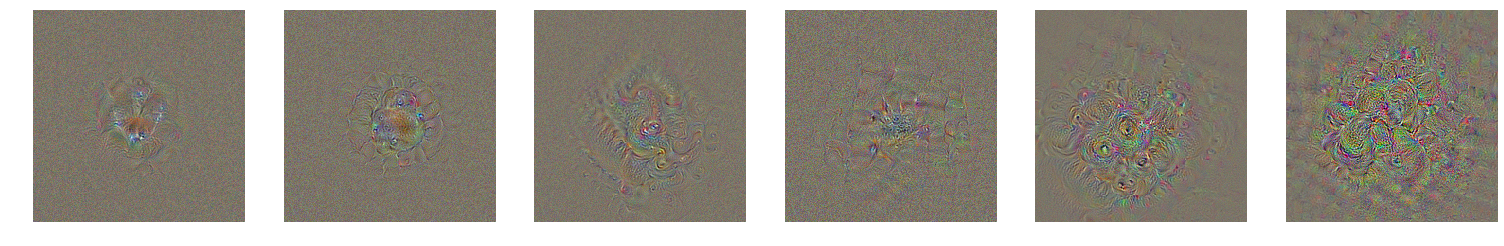

In [46]:
plots.plot_imshows(tmp_imgs, show_flag=True, nrow=len(seeds), ncol=6, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)

In [47]:
root = "/data2/genta/resnet/analysis/optimalinput-seeds-64-30/"
key_arch = "resnet34-skip4"
key_layer = "layer4"

In [48]:
exts = ("png", "pdf")

In [49]:
# out_dir = os.path.join("20210106", "{}_{}".format(key_arch, key_layer))
out_dir = os.path.join("20210207", "{}_{}".format(key_arch, key_layer))
make_dir(out_dir)

In [50]:
# seeds = [0, 1230, 2020, 20201230]
seeds = [0,]
key_word = "add_func"
# key_word = "bn2"
imgs_seed = {}
for seed in seeds:
    imgs = []
    for path in sorted(glob(os.path.join(root, "{}*{}*{}".format(key_arch, key_layer, key_word), "*{:08}.npy".format(seed)))):
        print(path)
        data = np.load(path)
        print(data.shape)
        imgs.append(data)
    imgs_seed[seed] = imgs

/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-skip4_layer-layer4.0.add_func/other-images00000000.npy
(512, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-skip4_layer-layer4.1.add_func/other-images00000000.npy
(512, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds-64-30/resnet34-skip4_layer-layer4.2.add_func/other-images00000000.npy
(512, 3, 224, 224)


In [51]:
def preprocess(_img):
    img = plots.normalize_inputspace(_img)
    img = plots.input2image(img)
#     img = plots.input2image(_img)
    return img

seed = 0
ch = 332
tmp_imgs = [preprocess(im[ch]) for seed in seeds for im in imgs_seed[seed]]

In [52]:
out_name = "{:03}".format(ch)

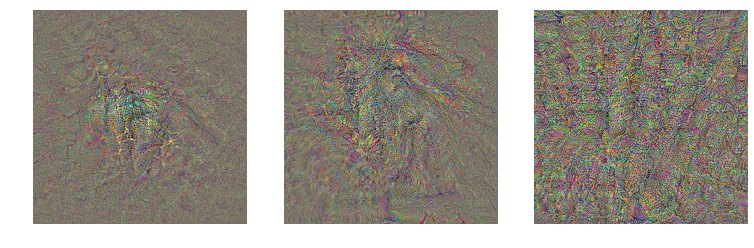

In [53]:
plots.plot_imshows(tmp_imgs, show_flag=True, nrow=len(seeds), ncol=6, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)